In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("covid19_cleaned_8_10.zip", low_memory = False)
#df = pd.read_csv("cleanedcoviddata_.zip", low_memory = False)
df[:5]

,Unnamed: 0,ID,age,sex,city,province,country,latitude,longitude,date_onset_symptoms,...,cough,fatigue,headache,dizziness,sore throat,pneumonia,respiratory,nausea,diarrhea,severe_r
0,0,000-1-1,49.090229,male,Shek Lei,Hong Kong,China,22.365019,114.133808,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,000-1-10,78.000000,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,000-1-100,61.000000,female,NaN,NaN,Singapore,1.353460,103.815100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,000-1-1000,49.090229,male,Zhengzhou City,Henan,China,34.629310,113.468000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,000-1-10000,49.090229,male,Pingxiang City,Jiangxi,China,27.513560,113.902900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#for date_confirmation column we are missing 108376 rows of date out of the total 2309996 rows.
#we will drop the missing vals. should not affect data.

df = df.dropna(subset = ["date_confirmation"])

In [4]:
countries_group = df.groupby(["country"]).count()
covid_count = countries_group.loc[countries_group["ID"] >= 2000]

#create a list of the countries with the most infections...
country_list = list(covid_count.index)

#create a dataframe of total cases per country...
top_count_cases = covid_count["ID"]

#create a list of the densities for each of the respective countries...
density_list = [106.14, 45.59, 376, 25, 22.98, 146, 135.43, 63, 100, 16.33, 123.28,
               233, 415, 51, 70.03, 200, 64, 421, 218, 112, 9, 48.14, 517, 93,
               23, 106, 69.49, 279.95, 34]

#dictionary of countries to density...
dict_count_dens = dict(zip(country_list, density_list))
dict_count_dens

{'Austria': 106.14,
 'Belarus': 45.59,
 'Belgium': 376,
 'Brazil': 25,
 'Chile': 22.98,
 'China': 146,
 'Czech Republic': 135.43,
 'Ecuador': 63,
 'Egypt': 100,
 'Finland': 16.33,
 'France': 123.28,
 'Germany': 233,
 'India': 415,
 'Iran': 51,
 'Ireland': 70.03,
 'Italy': 200,
 'Mexico': 64,
 'Netherlands': 421,
 'Nigeria': 218,
 'Portugal': 112,
 'Russia': 9,
 'South Africa': 48.14,
 'South Korea': 517,
 'Spain': 93,
 'Sweden': 23,
 'Turkey': 106,
 'Ukraine': 69.49,
 'United Kingdom': 279.95,
 'United States': 34}

In [5]:
#Cleaning the dates for analysis

dates_ID = df.groupby("date_confirmation").count()["ID"]
dates = list(dates_ID.index)
dates = [str(x) for x in dates]
dates.sort(key = lambda date: dt.datetime.strptime(date, '%d.%m.%Y')) 
x = [dt.datetime.strptime(times,"%d.%m.%Y").date() for times in dates]

total_cases = []
y = np.array(dates_ID[:])
for idx, val in enumerate(y):
    if idx == 0:
        cases = val
        total_cases.append(cases)
    else:
        cases = total_cases[idx - 1] + val
        total_cases.append(cases)
total_cases = np.array(total_cases)

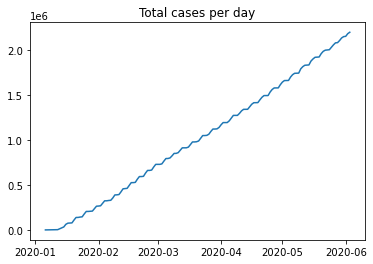

In [6]:
plt.plot(x, total_cases)
plt.title("Total cases per day");

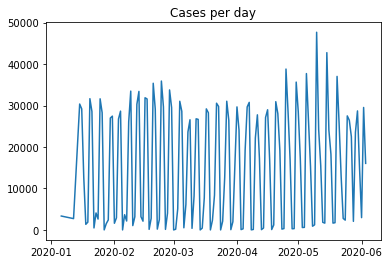

In [7]:
plt.plot(x, y)
plt.title("Cases per day");

In [8]:
#Analysis of cases in China
country = df.country
date_conf = df.date_confirmation
china_cases = date_conf[country == "China"]

#dates as x-values
unique_days = list(china_cases[:].unique())
unique_days.sort(key = lambda date: dt.datetime.strptime(date, '%d.%m.%Y'))
xvals = [dt.datetime.strptime(times,"%d.%m.%Y").date() for times in unique_days]

#occurences as y-values
china_cases = list(china_cases)
occur = []
for day in unique_days:
    occur.append(china_cases.count(day))
yvals = occur

Text(0.5, 1.0, 'Cases per day in China')

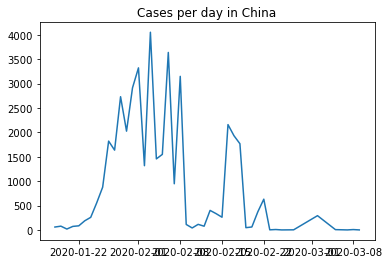

In [9]:
plt.plot(xvals,yvals)
plt.title("Cases per day in China")

Text(0.5, 1.0, 'Total cases in China')

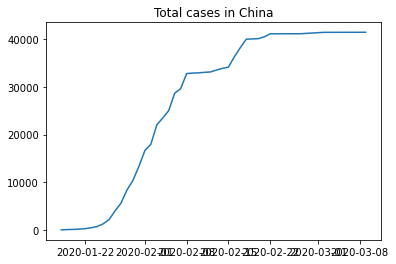

In [10]:
total_cases = []
y = np.array(yvals)
for idx, val in enumerate(y):
    if idx == 0:
        cases = val
        total_cases.append(cases)
    else:
        cases = total_cases[idx - 1] + val
        total_cases.append(cases)
total_cases = np.array(total_cases)

plt.plot(xvals, total_cases)
plt.title("Total cases in China")

In [11]:
#Here the creation of a function will expedite the process of analyzing all the countries in our list.
def countrycleansplots(location):
    country = df.country
    date_conf = df.date_confirmation
    loc_cases = date_conf[country == location]

    #dates as x-values
    unique_days = list(loc_cases[:].unique())
    unique_days.sort(key = lambda date: dt.datetime.strptime(date, '%d.%m.%Y'))
    X = [dt.datetime.strptime(times,"%d.%m.%Y").date() for times in unique_days]

    #occurences as y-values
    loc_cases = list(loc_cases)
    occur = []
    for day in unique_days:
        occur.append(loc_cases.count(day))
    Y = occur
    return(X, Y)

#This function here sums the cases on a day-by-day basis.
def sumcases(yvals):
    total_cases = []
    y = np.array(yvals)
    for idx, val in enumerate(y):
        if idx == 0:
            cases = val
            total_cases.append(cases)
        else:
            cases = total_cases[idx - 1] + val
            total_cases.append(cases)
    total_cases = np.array(total_cases)
    return(total_cases)

Text(0, 0.5, 'Cases per day')

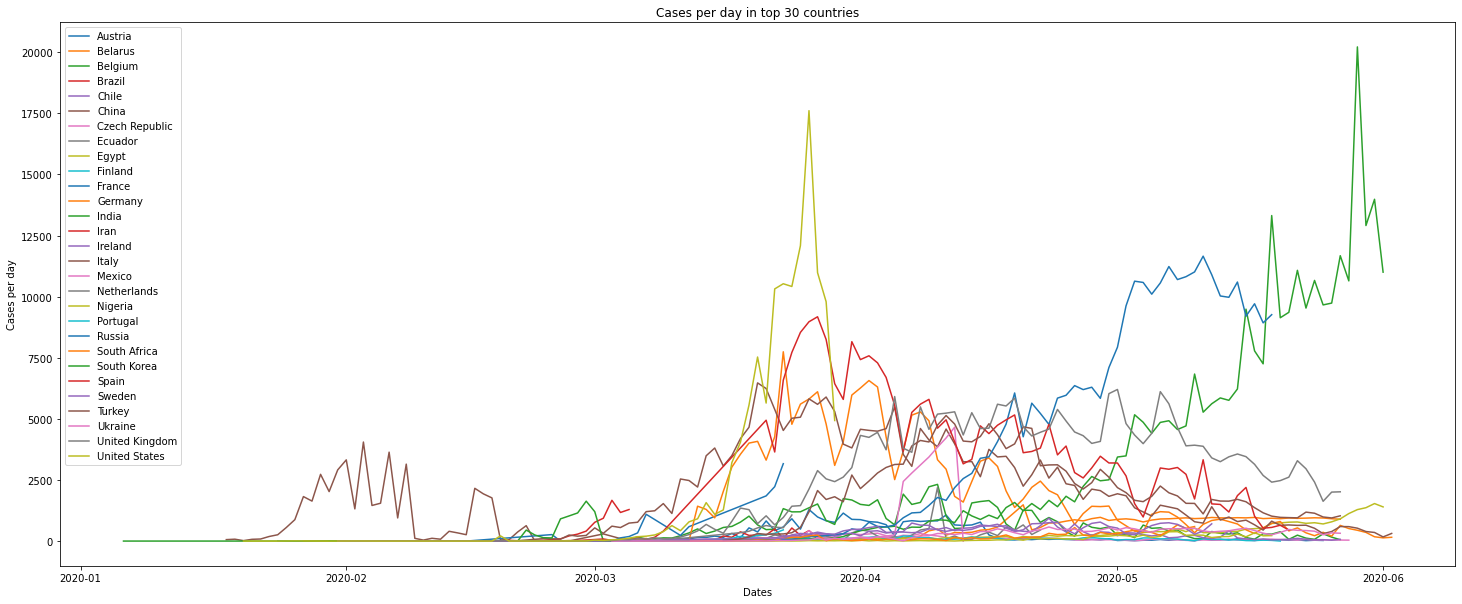

In [12]:
#Utilize the above functions to create the plot down below...

for place in country_list:
    X, Y = countrycleansplots(place)
    plt.plot(X, Y, label = place)
plt.legend()
plt.title("Cases per day in top 30 countries")
plt.gcf().set_size_inches(25,10)
plt.xlabel("Dates")
plt.ylabel("Cases per day")

Text(0, 0.5, 'Total Cases')

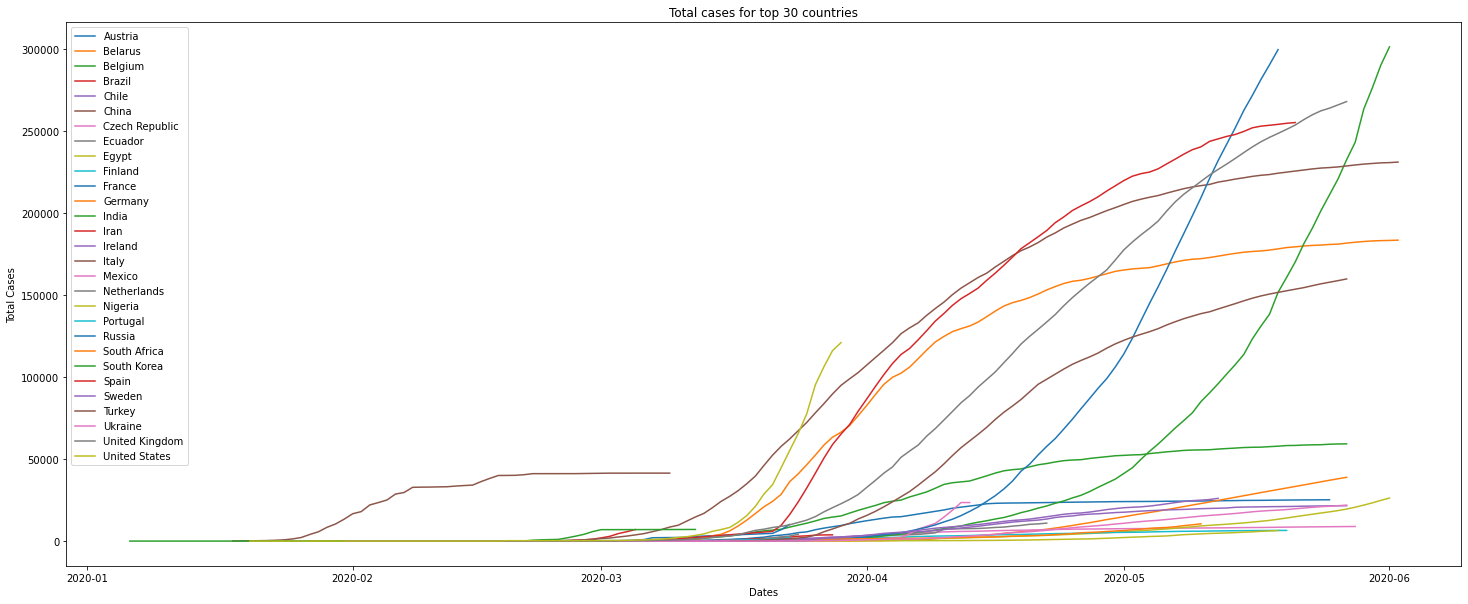

In [13]:
for place in country_list:
    X, Y = countrycleansplots(place)
    total = sumcases(Y)
    plt.plot(X, total, label = place)
plt.legend()
plt.title("Total cases for top 30 countries")
plt.gcf().set_size_inches(25,10)
plt.xlabel("Dates")
plt.ylabel("Total Cases")

In [14]:
#This function calculates the rate at which the disease spreads. It takes the average rate of change from the highest point
#on the graph to the smallest point.

def spreadCOVID(places):
    growth = []
    for place in places:
        X, Y = countrycleansplots(place)
        total = sumcases(Y)
        case0 = min(Y); case1 = max(Y); case0_idx = Y.index(min(Y)); case1_idx = Y.index(max(Y))
        date0 = X[case0_idx]; date1 = X[case1_idx]
        numer = case1 - case0
        denom = int(str(date1 - date0).split()[0])
        rate_growth = numer/denom
        
        #in case the rate of growth is negative we have fail safe...
        if rate_growth < 0:
            date0 = min(X); date0_idx = X.index(max(X))
            case0 = Y[date0_idx]
            denom = int(str(date1 - date0).split()[0])
            numer = case1 - case0
            rate_growth = numer/denom
            
        growth.append(rate_growth)
        
    return(growth)

#units for variable is (total infected/day)
spread = spreadCOVID(country_list)

In [15]:
#match the corresponding values with each other.

country_spread_dict = dict(zip(country_list, spread))
country_spread_dict

{'Austria': 43.0,
 'Belarus': 44.54545454545455,
 'Belgium': 35.15151515151515,
 'Brazil': 19.142857142857142,
 'Chile': 12.36,
 'China': 253.1875,
 'Czech Republic': 9.818181818181818,
 'Ecuador': 53.51219512195122,
 'Egypt': 16.86813186813187,
 'Finland': 5.024390243902439,
 'France': 57.56363636363636,
 'Germany': 138.28571428571428,
 'India': 168.45833333333334,
 'Iran': 128.15384615384616,
 'Ireland': 17.314814814814813,
 'Italy': 150.48837209302326,
 'Mexico': 105.9090909090909,
 'Netherlands': 41.0,
 'Nigeria': 6.416666666666667,
 'Portugal': 21.80952380952381,
 'Russia': 166.5,
 'South Africa': 10.67741935483871,
 'South Korea': 30.22222222222222,
 'Spain': 163.85714285714286,
 'Sweden': 8.730337078651685,
 'Turkey': 196.5,
 'Ukraine': 11.313725490196079,
 'United Kingdom': 74.72289156626506,
 'United States': 475.86486486486484}

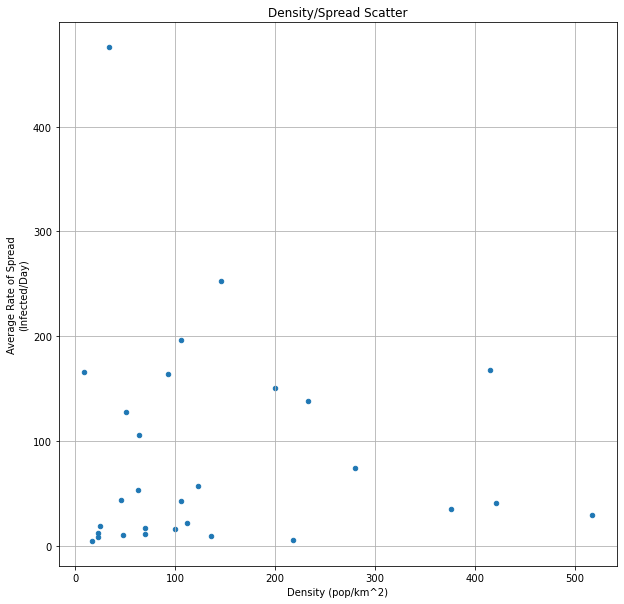

In [16]:
#now we will attempt to plot the density (x) against the spread (y)

pop_dens = [dict_count_dens[x] for x in dict_count_dens]
dis_spread = [country_spread_dict[x] for x in country_spread_dict]

plt.scatter(pop_dens, dis_spread, s = 20)
plt.xlabel("Density (pop/km^2)")
plt.ylabel("Average Rate of Spread\n(Infected/Day)")
plt.title("Density/Spread Scatter")
plt.grid()
plt.gcf().set_size_inches(10,10);

In [17]:
#perform a linear regression to see how well a line fits the collection of data.
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

LRfit = linregress(pop_dens, dis_spread)
LRfit

LinregressResult(slope=-0.03770706103231652, intercept=90.40960741151856, rvalue=-0.050624189424682456, pvalue=0.7942506917676617, stderr=0.1431612554136298)

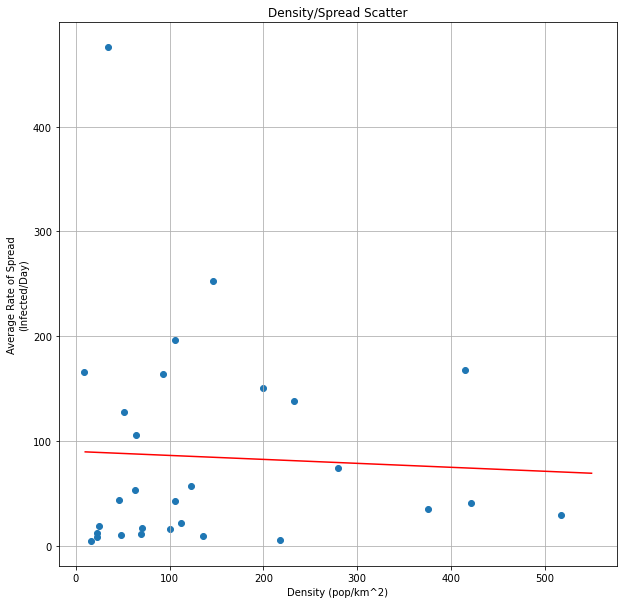

In [18]:
plt.scatter(pop_dens, dis_spread)
plt.xlabel("Density (pop/km^2)")
plt.ylabel("Average Rate of Spread\n(Infected/Day)")
plt.title("Density/Spread Scatter")
plt.grid()
plt.gcf().set_size_inches(10,10);
a = LRfit[1]; b = LRfit[0]
plt.plot([10,550],[a+b*10,a+b*550], color="red")

In [19]:
#Here we try to see if we can fit a polynomial to the data, to no avail.
def fit_a_polynomial(X,Y,degree):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    fit = np.polyfit(xtrain, ytrain, degree)
    ypredicted = np.polyval(fit, xtest)     
    error = mean_squared_error(ytest, ypredicted)
    return(error)

In [20]:
degrees = list(range(2,5))
means = []
sigmas = []
for deg in degrees:
    errors = []
    for repeat in range(200):
        errors.append(fit_a_polynomial(pop_dens, dis_spread, deg))
    means.append(np.mean(errors))
    sigmas.append(np.std(errors))

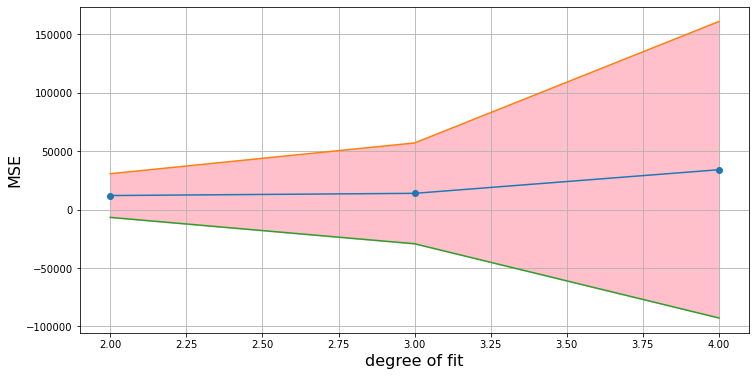

In [21]:
plt.plot(degrees,means,marker="o")
plt.plot(degrees,np.array(means)+2*np.array(sigmas)) # 95% 
plt.plot(degrees,np.array(means)-2*np.array(sigmas))
plt.fill_between(degrees, np.array(means)+2*np.array(sigmas), np.array(means)-2*np.array(sigmas), color="pink")
plt.grid()
plt.xlabel("degree of fit",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.gcf().set_size_inches(12,6)
#here we can note that both a linear and polynomial fit fail to fill in the model...
#margin of error for smaller degrees is bad, and continues to get worse as number increases

In [22]:
print(country_spread_dict)
print(dict_count_dens)

{'Austria': 43.0, 'Belarus': 44.54545454545455, 'Belgium': 35.15151515151515, 'Brazil': 19.142857142857142, 'Chile': 12.36, 'China': 253.1875, 'Czech Republic': 9.818181818181818, 'Ecuador': 53.51219512195122, 'Egypt': 16.86813186813187, 'Finland': 5.024390243902439, 'France': 57.56363636363636, 'Germany': 138.28571428571428, 'India': 168.45833333333334, 'Iran': 128.15384615384616, 'Ireland': 17.314814814814813, 'Italy': 150.48837209302326, 'Mexico': 105.9090909090909, 'Netherlands': 41.0, 'Nigeria': 6.416666666666667, 'Portugal': 21.80952380952381, 'Russia': 166.5, 'South Africa': 10.67741935483871, 'South Korea': 30.22222222222222, 'Spain': 163.85714285714286, 'Sweden': 8.730337078651685, 'Turkey': 196.5, 'Ukraine': 11.313725490196079, 'United Kingdom': 74.72289156626506, 'United States': 475.86486486486484}
{'Austria': 106.14, 'Belarus': 45.59, 'Belgium': 376, 'Brazil': 25, 'Chile': 22.98, 'China': 146, 'Czech Republic': 135.43, 'Ecuador': 63, 'Egypt': 100, 'Finland': 16.33, 'France

The scatter plot does not have any good linear or polynomial fits because there are countries with low population densities with a high average spread of disease (i.e. the US).

Besides the primary offender, the scatter has data that's mostly horizontal.

With all the information provided from the fitness of models, I can most certainly conclude that the population density of a country has little impact on the spread of the COVID-19 virus.

I hypothesize the reason for this may be that the data is not as complete as it could be. Other countries are not reporting their cases as accurately as other countries. The US has been very good at reporting their data. This may be why even though it has a low population density, it has a high average rate of spread.